# Problem: Implement a linear regression model to predict the prices of houses based on the square footage and number of bedrooms and bathrooms.

# Loading the DataSet

In [20]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/padopadi/CODECRAFT_ML_01/refs/heads/main/test.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/padopadi/CODECRAFT_ML_01/refs/heads/main/train.csv')

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
train_df.shape

(1460, 81)

## DataPreparation

In [23]:
train_df['TotalBathrooms'] = ( train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
test_df['TotalBathrooms'] = ( test_df['FullBath'] + 0.5 * test_df['HalfBath'] + test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'])

## Data Spliting

## X and y Training datset

In [24]:
y_train = train_df['SalePrice']
x_train = train_df[['TotalBathrooms', 'GrLivArea', 'BedroomAbvGr']]
x_test = test_df[['TotalBathrooms', 'GrLivArea', 'BedroomAbvGr']]

In [25]:
x_test.isnull().sum()

,0
TotalBathrooms,2
GrLivArea,0
BedroomAbvGr,0


In [26]:
x_test = x_test.fillna(0)

In [27]:
x_test.isnull().sum()

,0
TotalBathrooms,0
GrLivArea,0
BedroomAbvGr,0


# Model Building

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train )

LinearRegression()

### **Applying the model to make prediction**

In [29]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

**Result**

In [30]:
print(lr_train_pred)

[235812.97141766 161110.30899439 243397.9188275  ... 229789.04032411
 151663.11818872 160511.49735677]


In [31]:
print(lr_test_pred)

[103507.77169986 137805.6454667  197737.62082872 ... 118410.07572709
 101976.7491492  234764.14042146]


### **Evaluation**

### Model Performance

In [32]:
from sklearn.metrics import r2_score , mean_squared_error

train_lr_mse = mean_squared_error(y_train, lr_train_pred)
train_lr_r2 = r2_score(y_train, lr_train_pred)


In [33]:
print('LR MSE TRAIN:', train_lr_mse)
print('LR R2 TRAIN:', train_lr_r2)

LR MSE TRAIN: 2435642603.2188134
LR R2 TRAIN: 0.6138062073498352


### Results Table

In [34]:
lr_results = pd.DataFrame(['LinearRegression', train_lr_mse, train_lr_r2]).transpose()
lr_results.columns = ['Meathod', 'Training mse', 'Training r2']

In [35]:
lr_results

,Meathod,Training mse,Training r2
0,LinearRegression,2435642603.218813,0.613806


### Accuracy Comparison

In [36]:
accuracy = pd.DataFrame({"Actual Price": y_train, "Predicted Price": lr_train_pred, "Error": lr_train_pred - y_train })

In [37]:
accuracy.head(10)

,Actual Price,Predicted Price,Error
0,208500,235812.971418,27312.971418
1,181500,161110.308994,-20389.691006
2,223500,243397.918827,19897.918827
3,140000,191524.494773,51524.494773
4,250000,260604.255122,10604.255122
5,143000,218914.628598,75914.628598
6,307000,219220.443643,-87779.556357
7,200000,273737.708467,73737.708467
8,129900,221125.268152,91225.268152
9,118000,151563.316249,33563.316249


# Data Visualization

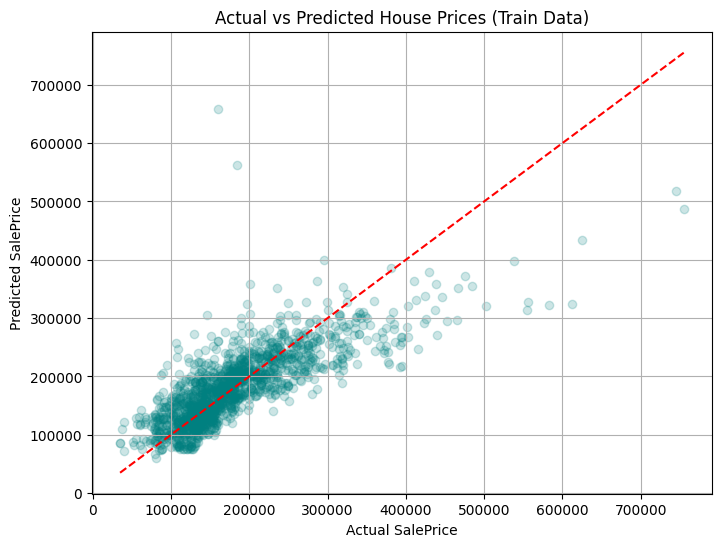

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_train, lr_train_pred, alpha=0.2, color='teal')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted House Prices (Train Data)")
plt.grid(True)
plt.show()